<a href="https://colab.research.google.com/github/Vvitoor21/Python/blob/master/02_Resultados_De_Jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
dados = pd.DataFrame(pd.read_csv('/content/sample_data/vgsales.csv'))
dados.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [ ]:
dados.rename(columns = {'Name':'Nome','Platform':'Plataforma','Year':'Ano','Genre':'Genero','Publisher':'Desenvolvedora',
                       'Global_Sales':'Total','Other_Sales':'Outras_Vendas'}, inplace = True)
dados.head(3)

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [ ]:
dados = dados[(dados.Ano >= 2006.0) & (dados.Ano <= 2006.0)]

In [ ]:
dados['Percentual_EU'] = (dados['EU_Sales'] / dados['Total']).round(2)
dados

,Rank,Nome,Plataforma,Ano,Genero,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total,Percentual_JP,Percentual_EU
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.05,0.35
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,0.22,0.31
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,0.10,0.32
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36,0.33,0.25
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31,0.08,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,16516,Deal or No Deal,PC,2006.0,Misc,Focus Home Interactive,0.00,0.01,0.00,0.00,0.01,0.00,1.00
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006.0,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01,1.00,0.00
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01,1.00,0.00
16547,16550,Bookworm Deluxe,PC,2006.0,Puzzle,PopCap Games,0.01,0.00,0.00,0.00,0.01,0.00,0.00


In [ ]:
dados.dtypes

Rank                int64
Nome               object
Plataforma         object
Ano               float64
Genero             object
Desenvolvedora     object
NA_Sales          float64
EU_Sales          float64
JP_Sales          float64
Outras_Vendas     float64
Total             float64
Percentual_JP     float64
dtype: object

In [ ]:
Desenvolvedoras = pd.DataFrame(dados.Desenvolvedora.value_counts())
Desenvolvedoras.sort_values(by = 'Desenvolvedora', ascending = False, inplace = True)
Desenvolvedoras.reset_index(inplace = True)
Desenvolvedoras.rename(columns = {'index':'Desenvolvedora','Desenvolvedora':'Qtd'}, inplace = True)
Desenvolvedoras['Qtd'] = np.array(Desenvolvedoras['Qtd']).astype(int)
Desenvolvedoras = Desenvolvedoras.head(10)

Text(0.5, 1.0, 'Maiores Quantidades de desenvolvedoras de jogos em 2006')

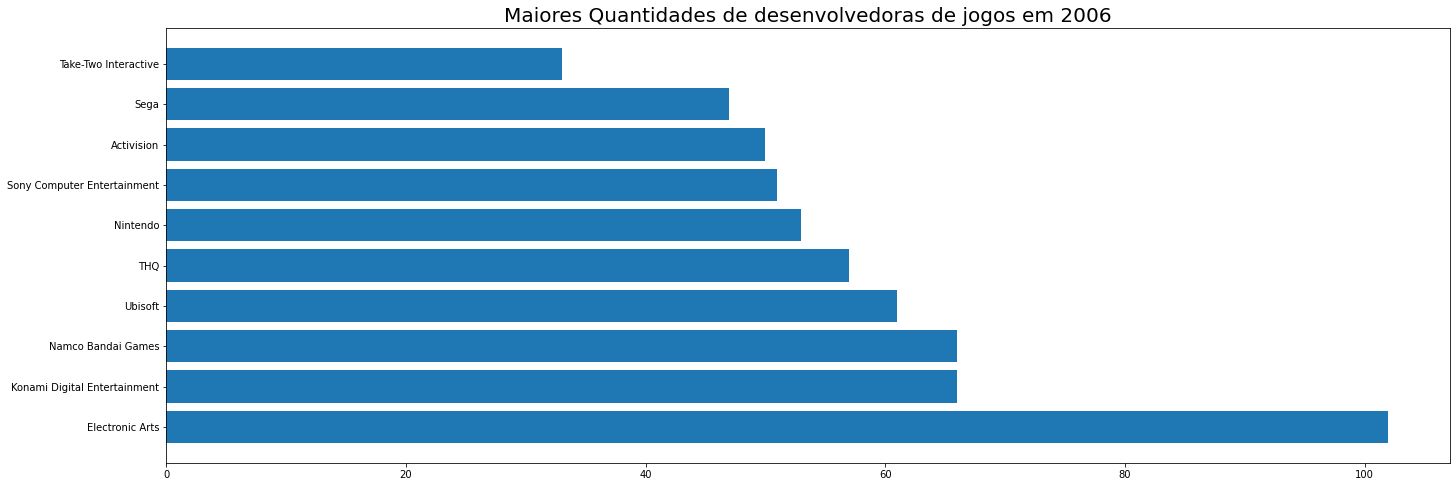

In [ ]:
plt.figure(figsize = (23,8))
plt.barh(Desenvolvedoras.Desenvolvedora,Desenvolvedoras.Qtd)
plt.title('Maiores Quantidades de desenvolvedoras de jogos em 2006', fontsize = 20)

In [ ]:
dados.groupby('Genero').max()

,Rank,Nome,Plataforma,Ano,Desenvolvedora,NA_Sales,EU_Sales,JP_Sales,Outras_Vendas,Total
Genero,,,,,,,,,,
Action,16416,Zombie Hunters 2,XB,2006.0,Zoo Digital Publishing,3.83,2.19,0.60,1.21,7.31
Adventure,16507,Yoake Yori Ruriiro na: Brighter than Dawning Blue,XB,2006.0,Zoo Digital Publishing,0.59,0.88,0.84,0.22,1.48
Fighting,16283,Wrestle Kingdom,XB,2006.0,Yuke's,1.40,1.10,0.74,0.65,2.63
Misc,16526,Zaidan Houjin Nippon Kanji Nouryoku Kentei Kyo...,XB,2006.0,Zoo Digital Publishing,14.03,9.20,2.93,2.85,29.02
Platform,16501,Yoshi's Island DS,XB,2006.0,Warner Bros. Interactive Entertainment,11.38,9.23,6.50,2.90,30.01
Puzzle,16571,XI Coliseum,X360,2006.0,Zoo Digital Publishing,0.87,1.06,1.35,0.26,2.92
Racing,16492,Tourist Trophy: The Real Riding Simulator,XB,2006.0,Xplosiv,1.53,1.61,0.16,0.67,3.88
Role-Playing,16523,Zoids Dash,X360,2006.0,Unknown,6.42,4.52,6.04,1.74,18.36
Shooter,16337,World War II Combat: Road To Berlin,XB,2006.0,Vivendi Games,3.54,1.90,0.52,0.75,6.11


In [ ]:
dados.groupby('Genero')['Total'].max()

Genero
Action           7.31
Adventure        1.48
Fighting         2.63
Misc            29.02
Platform        30.01
Puzzle           2.92
Racing           3.88
Role-Playing    18.36
Shooter          6.11
Simulation       5.72
Sports          82.74
Strategy         0.78
Name: Total, dtype: float64

In [ ]:
df = pd.DataFrame({
    'Company': ['A', 'A', 'A', 'B', 'B', 'B', 'B'],
    'Model': ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'B4'],
    'Year': [2019, 2020, 2021, 2018, 2019, 2020, 2021],
    'Transmission': ['Manual', 'Automatic', 'Automatic', 'Manual', 'Automatic', 'Automatic', 'Manual'],
    'EngineSize': [1.4, 2.0, 1.4, 1.5, 2.0, 1.5, 1.5],
    'MPG': [55.4, 67.3, 58.9, 52.3, 64.2, 68.9, 83.1]
})

In [ ]:
df.groupby(['Company', 'Transmission'])['MPG'].max()

Company  Transmission
A        Automatic       67.3
         Manual          55.4
B        Automatic       68.9
         Manual          83.1
Name: MPG, dtype: float64

In [ ]:
dados.groupby(['Genero',max('Desenvolvedora')])['Total'].max()

KeyError: ignored